# Building models in Logistic

## Data Description-

**age:** numeric
<br>**job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
<br>**marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>**education:** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>**default:** has credit in default? (categorical: 'no','yes','unknown')
<br>**housing:** has housing loan? (categorical: 'no','yes','unknown')
<br>**loan:** has personal loan? (categorical: 'no','yes','unknown')
<br>**contact:** contact communication type (categorical: 'cellular','telephone') 
<br>**month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>**day_of_week:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>**duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>**campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>**previous:** number of contacts performed before this campaign and for this client (numeric)
<br>**poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>**emp.var.rate:** employment variation rate - quarterly indicator (numeric)
<br>**cons.price.idx:** consumer price index - monthly indicator (numeric) 
<br>**cons.conf.idx:** consumer confidence index - monthly indicator (numeric) 
<br>**euribor3m:** euribor 3 month rate - daily indicator (numeric)
<br>**nr.employed:** number of employees - quarterly indicator (numeric)

In [82]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [83]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [84]:
import os
os.chdir("C:\\Users\\nilim\\Python\\Internship")
os.getcwd()

'C:\\Users\\nilim\\Python\\Internship'

In [85]:
filename = "C:\\Users\\nilim\\Python\\Internship\\bank.csv"
bank = pd.read_csv(filename,sep=';')

In [86]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [87]:
bank.shape

(4521, 17)

In [88]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [89]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [90]:
bank.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [91]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [92]:
bank['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [93]:
bank['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [94]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [95]:
bank['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [96]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [97]:
bank['pdays'].unique()

array([ -1, 339, 330, 176, 147, 241, 152, 105, 342, 101,   5,  92,  56,
       170, 182, 297, 196, 460, 137, 367, 145, 169, 207, 266, 288, 168,
       345, 436,  90, 183, 146, 335, 347, 119,   7, 271, 181,  88, 141,
       126,  61, 373, 351, 242,  62,  91, 308, 250, 172, 265,  78,  28,
        79,   1, 188, 167,  89, 164, 462, 209, 321, 254,  94, 364,  96,
       356, 149, 363, 275, 325, 341, 260, 358,  87, 303,  98, 327, 337,
       322, 102,  99, 370,  84, 212,  63,  81, 191, 360, 332,  80,  85,
       247, 150, 175, 382, 261, 336,  58, 206, 112, 199, 133, 208, 253,
       135, 278, 140, 298, 273, 124, 281, 162, 323, 349, 117,   2, 256,
       333, 116, 268, 136, 198, 357, 259, 353, 174, 371, 205, 246,  69,
       315, 110, 461, 184, 270, 127, 187,  64, 130, 346, 100, 352, 808,
       113, 378, 292, 287, 107, 293, 139, 138, 193, 274,  97, 103, 359,
       185, 674, 211, 300, 334, 280, 479,  95, 262, 362, 225,   3, 366,
        60, 190, 368, 122, 343, 131, 365, 299, 115, 316, 180, 15

In [98]:
bank['campaign'].unique()

array([ 1,  4,  2,  5,  3,  6, 18, 10,  9,  7, 12, 14, 13, 24, 11,  8, 29,
       32, 16, 22, 15, 30, 25, 21, 17, 19, 23, 20, 50, 28, 31, 44],
      dtype=int64)

In [99]:
bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

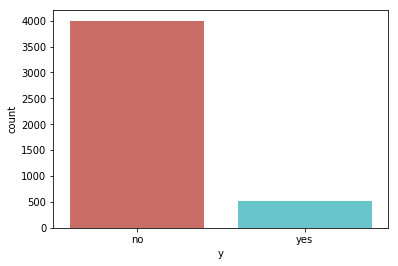

In [100]:
sns.countplot(x='y',data=bank,palette='hls')
plt.show()

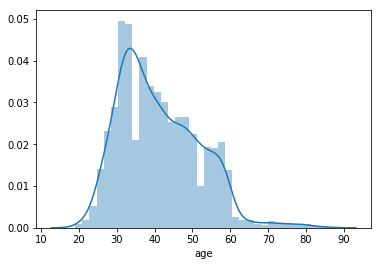

In [101]:
sns.distplot(bank['age'])

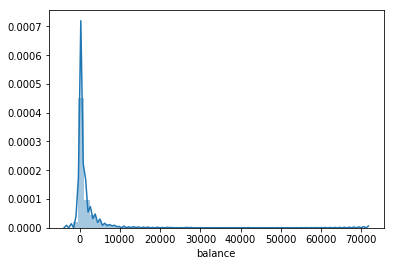

In [102]:
sns.distplot(bank['balance'])

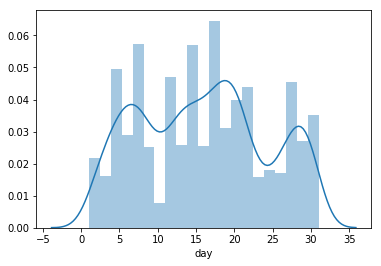

In [103]:
sns.distplot(bank['day'])

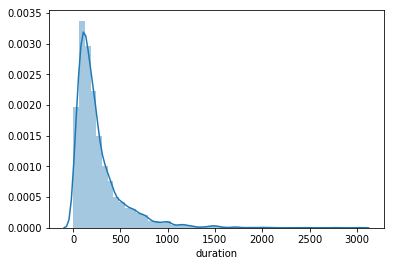

In [104]:
sns.distplot(bank['duration'])

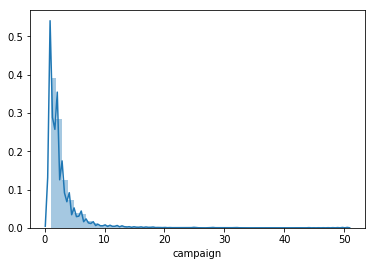

In [105]:
sns.distplot(bank['campaign'])

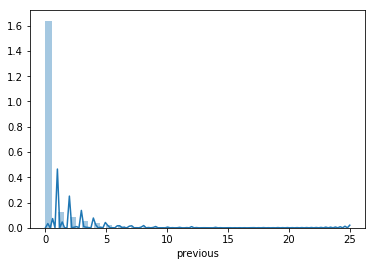

In [106]:
sns.distplot(bank['previous'])

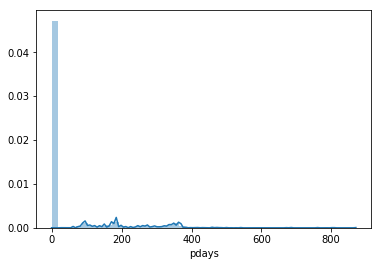

In [107]:
sns.distplot(bank['pdays'])

In [108]:
bank.groupby('age').mean()

,balance,day,duration,campaign,pdays,previous
age,,,,,,
19,393.500000,10.750000,223.750000,6.000000,-1.000000,0.000000
20,661.333333,17.666667,235.666667,2.333333,123.000000,1.666667
21,1774.285714,17.000000,235.142857,2.428571,55.285714,1.571429
22,1455.333333,12.333333,186.666667,1.333333,23.777778,1.444444
23,2117.950000,16.500000,254.500000,3.050000,16.350000,0.050000
24,634.625000,17.500000,222.666667,2.250000,31.875000,0.166667
25,1240.068182,17.454545,227.181818,3.000000,34.272727,0.318182
26,788.558442,18.402597,247.532468,3.142857,29.922078,0.480519
27,851.776596,16.500000,304.904255,2.744681,41.765957,0.372340


In [109]:
bank.groupby('duration').mean()

,age,balance,day,campaign,pdays,previous
duration,,,,,,
4,28.000000,318.000000,27.000000,4.000000,-1.000000,0.000000
5,39.444444,2521.444444,20.444444,4.555556,105.666667,2.000000
6,28.500000,510.000000,20.500000,3.500000,-1.000000,0.000000
7,40.333333,3380.833333,17.833333,6.500000,150.000000,4.500000
8,40.444444,3317.555556,12.111111,4.555556,172.555556,1.555556
9,40.300000,194.500000,19.100000,5.200000,33.800000,1.700000
10,37.777778,1176.000000,15.222222,4.555556,78.888889,0.222222
11,35.875000,967.500000,20.625000,7.250000,39.000000,0.250000
12,34.600000,1550.600000,18.000000,8.600000,142.600000,2.000000


Text(0, 0.5, 'Frequency')

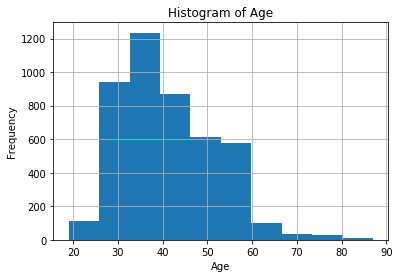

In [110]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

## Correlation Matrix

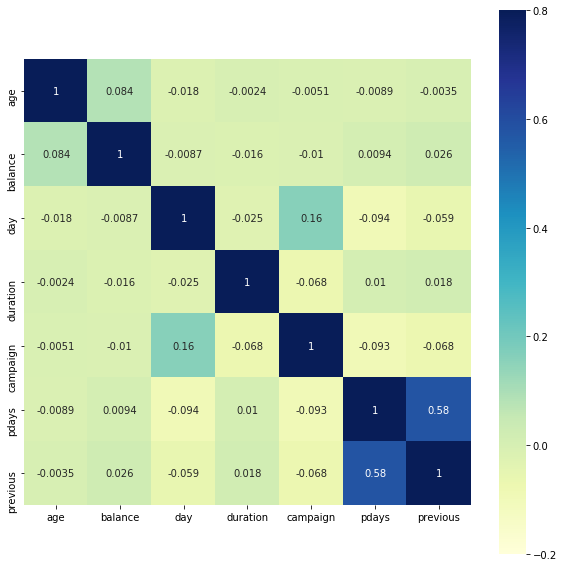

In [111]:
fig, ax=plt.subplots(figsize=(10,10))
correlation=bank.corr()
sns.heatmap(correlation,square=True, vmin=-0.2, vmax=0.8,cmap="YlGnBu",annot=True)

## Separating Categorical and Numerical Features

In [112]:
numerical_features=bank.dtypes[bank.dtypes!="object"].index

print("Number of numerical features",len(numerical_features))
print(numerical_features)

#Pulling out names of categorical variables by conditioning dtypes
#Equal to object type

categorical_features=bank.dtypes[bank.dtypes=="object"].index
print("Number of categorical features",len(categorical_features))
print(categorical_features)

Number of numerical features 7
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Number of categorical features 10
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [113]:
num_cols=['int16','int32','int64','float16','float32','float64']
numcols_only=bank.select_dtypes(include=num_cols)
numcols_only

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
5,35,747,23,141,2,176,3
6,36,307,14,341,1,330,2
7,39,147,6,151,2,-1,0
8,41,221,14,57,2,-1,0
9,43,-88,17,313,1,147,2


## Applying Standard Scaling to Numerical Columns 

In [114]:
from sklearn.preprocessing import StandardScaler
colnames=numcols_only.iloc[:,0:14].columns.tolist()
colnames

bankdata_numcol= pd.DataFrame(StandardScaler().fit_transform(numcols_only.iloc[:,0:36]),columns=colnames)

bankdata_numcol

C:\Users\nilim\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nilim\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,balance,day,duration,campaign,pdays,previous
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413
5,-0.583458,-0.224523,0.859091,-0.473241,-0.255231,1.360836,1.451197
6,-0.488896,-0.370736,-0.232247,0.296499,-0.576829,2.899143,0.860660
7,-0.205209,-0.423904,-1.202326,-0.434754,-0.255231,-0.407218,-0.320413
8,-0.016085,-0.399314,-0.232247,-0.796532,-0.255231,-0.407218,-0.320413
9,0.173040,-0.501996,0.131532,0.188735,-0.576829,1.071155,0.860660


In [115]:
bankdata_catcol=bank.select_dtypes(exclude=num_cols)
bankdata_catcol.columns.values

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'y'], dtype=object)

## Creating Dummy Variables

In [116]:
bankdata_catcol= pd.get_dummies(bankdata_catcol, drop_first=True)
bankdata_catcol.head(3)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
bankdata_final=pd.concat([bankdata_numcol,bankdata_catcol],axis=1)
bankdata_final.head(3)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting into train and test data 

In [118]:
X= bankdata_final.iloc[:,0:42]
Y= bankdata_final['y_yes']

#Create train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=1)

In [119]:
X.dtypes

age                    float64
balance                float64
day                    float64
duration               float64
campaign               float64
pdays                  float64
previous               float64
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
marital_married          uint8
marital_single           uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
default_yes              uint8
housing_yes              uint8
loan_yes                 uint8
contact_telephone        uint8
contact_unknown          uint8
month_aug                uint8
month_dec                uint8
month_feb                uint8
month_jan                uint8
month_ju

## Building the Logistic Model

In [120]:
from sklearn.linear_model import LogisticRegression
logmodel1 = LogisticRegression()
r1=logmodel1.fit(X_train, Y_train)
r1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [121]:
r1.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [122]:
print(r1.coef_)

[[-0.02929517  0.07731173  0.07844367  1.10685016 -0.12072361 -0.00707381
   0.02880241 -0.35896415 -0.47793481 -0.30896037 -0.17163747  0.71017644
  -0.4668018   0.04563415  0.34434589 -0.23476932 -0.82728803  0.64255463
  -0.51962    -0.38110377  0.13043022  0.41537045 -0.17285589  0.39441258
  -0.31522506 -0.58454951 -0.08949074 -1.34621693 -0.31257355  0.21680402
   0.30825215 -0.86246411 -0.66769614  0.45524812  1.53513708 -0.38779726
  -0.82818336  1.15250627  0.22406043  0.40438304  2.2926911  -0.24016685]]


In [123]:
pred1 = logmodel1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logmodel1.score(X_test, Y_test)))
accuracy1=logmodel1.score(X_test,Y_test)

Accuracy of logistic regression classifier on test set: 0.88417


In [124]:
accuracy1

0.8841732979664014

### Confusion Matrix

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,pred1)
print(confusion_matrix)

[[955  33]
 [ 98  45]]


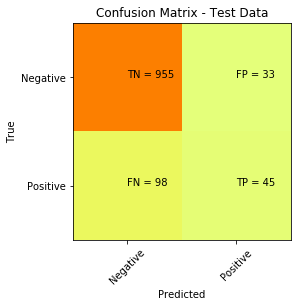

In [126]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

In [127]:
total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9069325735992403
Specificity :  0.5769230769230769


In [128]:
fpr, tpr, thresholds = roc_curve(Y_test, pred1)
a=auc(fpr,tpr)
print("Area under the curve:",a)

Area under the curve: 0.6406422524843577


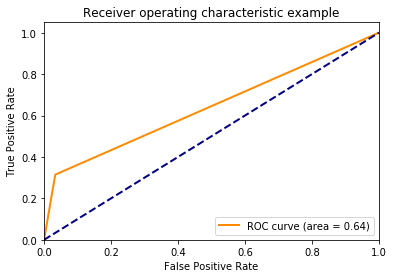

In [129]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % a)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [130]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       988
           1       0.58      0.31      0.41       143

   micro avg       0.88      0.88      0.88      1131
   macro avg       0.74      0.64      0.67      1131
weighted avg       0.87      0.88      0.87      1131



**Precision:** is the ratio TP / (TP + FP) where TP is number of true positives and FP number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

<br>**Recall:** is the ratio TP / (TP + FN) where TP is the number of true positives and FN number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

<br>**F-score:** can be interpreted as a weighted harmonic mean of the precision and recall, where an F score reaches its best value at 1 and worst score at 0. The F score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall.

<br>**Support:** is the number of occurrences of each class in y_test.

**Kappa coefficient-** A score that expresses the level of agreement between two annotators on a classification problem.

In [131]:
from sklearn.metrics import cohen_kappa_score
k1=cohen_kappa_score(Y_test,pred1,labels=None)
print("Kappa coefficient:",k1)

Kappa coefficient: 0.349151961624122


We can see from the output above that kappa coefficient is low. A kappa coefficient greater than 0.75 shows excellent agreement.

## Building the model only with significant variables

In [132]:
cols=['job_entrepreneur','marital_married','marital_single','balance','loan_yes','contact_unknown','month_jul',\
   'month_mar','month_may','month_nov','month_oct','duration','campaign','poutcome_other','poutcome_success'] 
x=bankdata_final[cols]
y=bankdata_final['y_yes']

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=10) 

In [134]:
print("x_train:",x_train.shape)
print("y_train",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (3616, 15)
y_train (3616,)
x_test: (905, 15)
y_test: (905,)


In [135]:
logmodel2 = LogisticRegression()
r2=logmodel2.fit(x_train, y_train)
r2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
print(r2.coef_)

[[ 0.20034139 -0.64019013 -0.38510733 -0.01141957 -0.58206478 -1.19341203
  -0.62414513  1.5208502  -0.71826406 -0.80334407  1.22643764  1.04266756
  -0.25359125  0.67710966  2.49467255]]


In [137]:
r2.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [138]:
pred2 = logmodel2.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logmodel2.score(x_test, y_test)))
accuracy2=logmodel2.score(x_test,y_test)

Accuracy of logistic regression classifier on test set: 0.89724


In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test,pred2)
print(confusion_matrix2)

[[779  17]
 [ 76  33]]


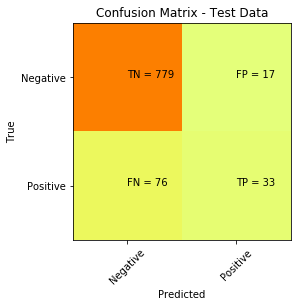

In [140]:
plt.clf()
plt.imshow(confusion_matrix2, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix2[i][j]))
plt.show()

In [141]:
total2=sum(sum(confusion_matrix2))

sensitivity2 = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[1,0])
print('Sensitivity : ', sensitivity2 )

specificity2 = confusion_matrix2[1,1]/(confusion_matrix2[1,1]+confusion_matrix2[0,1])
print('Specificity : ', specificity2)

Sensitivity :  0.9111111111111111
Specificity :  0.66


In [142]:
fpr, tpr, thresholds = roc_curve(y_test, pred2)
a2=auc(fpr,tpr)
print("Area under the curve:",a2)

Area under the curve: 0.6406977548291918


In [143]:
k2=cohen_kappa_score(y_test,pred2,labels=None)
print("Kappa coefficient:",k2)

Kappa coefficient: 0.36715666002481295


## Recursive Feature Engineering

In [144]:
final_vars=bankdata_final.columns.values.tolist()
Y=bankdata_final['y_yes']
X=[i for i in final_vars if i not in Y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Using SMOTE 

In [145]:
x=bankdata_final[cols]
y=bankdata_final['y_yes']

In [146]:
from imblearn.over_sampling import SMOTE
y.value_counts()

0    4000
1     521
Name: y_yes, dtype: int64

In [147]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

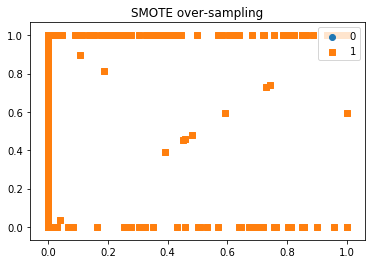

In [148]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(x, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [149]:
x_train, x_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size = .2, random_state=10) 

In [150]:
x_train

array([[ 0.        ,  1.        ,  0.        , ..., -0.57682947,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.57682947,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.38796743,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.57682947,
         0.64237458,  0.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.45878548,
         0.        ,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.2552305 ,
         0.        ,  0.        ]])

In [151]:
np.bincount(y_train)

array([3180, 3220], dtype=int64)

In [152]:
logmodel3 = LogisticRegression()
r3=logmodel3.fit(X_sm, y_sm)
r3

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [153]:
pred3 = logmodel3.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logmodel3.score(x_test, y_test)))
accuracy3=logmodel3.score(x_test,y_test)

Accuracy of logistic regression classifier on test set: 0.81750


In [154]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=uint8), array([820, 780], dtype=int64))

In [155]:
np.bincount(y_test)

array([820, 780], dtype=int64)

In [156]:
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(y_test,pred3)
print(confusion_matrix3)

[[690 130]
 [162 618]]


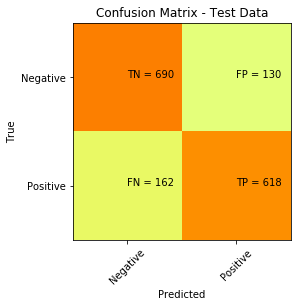

In [157]:
plt.clf()
plt.imshow(confusion_matrix3, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix3[i][j]))
plt.show()

In [158]:
sensitivity3 = confusion_matrix3[0,0]/(confusion_matrix3[0,0]+confusion_matrix3[1,0])
print('Sensitivity : ', sensitivity3 )

specificity3 = confusion_matrix3[1,1]/(confusion_matrix3[1,1]+confusion_matrix3[0,1])
print('Specificity : ', specificity3)

Sensitivity :  0.8098591549295775
Specificity :  0.8262032085561497


In [159]:
fpr, tpr, thresholds = roc_curve(y_test, pred3)
a3=auc(fpr,tpr)
print("Area under the curve:",a3)

Area under the curve: 0.8168855534709192


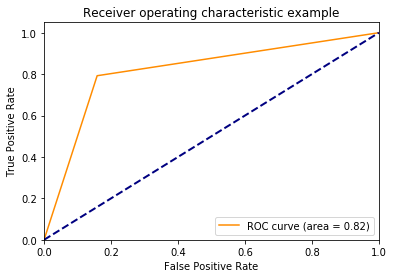

In [165]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % a3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       820
           1       0.83      0.79      0.81       780

   micro avg       0.82      0.82      0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600



In [162]:
k3=cohen_kappa_score(y_test,pred3,labels=None)
print("Kappa coefficient:",k3)

Kappa coefficient: 0.6344059096031051


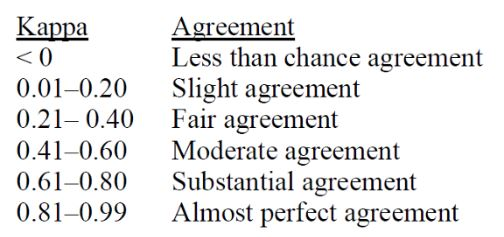